In [91]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
import pandas as pd
data = pd.read_csv('Housing.csv')
print(data)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [93]:
#x_train is the input variable, the size of the house in 1000 sq ft
#y_train is the output variable, the price of the house in $1000 

x_train = pd.DataFrame(data).to_numpy()[:, 1] / 1000
y_train = pd.DataFrame(data).to_numpy()[:, 0] / 1000
print(x_train)
print(x_train.shape)
print(y_train)
print(y_train.shape)

[7.42 8.96 9.96 7.5 7.42 7.5 8.58 16.2 8.1 5.75 13.2 6.0 6.55 3.5 7.8 6.0
 6.6 8.5 4.6 6.42 4.32 7.155 8.05 4.56 8.8 6.54 6.0 8.875 7.95 5.5 7.475
 7.0 4.88 5.96 6.84 7.0 7.482 9.0 6.0 6.0 6.55 6.36 6.48 6.0 6.0 6.0 6.0
 6.6 4.3 7.44 7.44 6.325 6.0 5.15 6.0 6.0 11.44 9.0 7.68 6.0 6.0 8.88 6.24
 6.36 11.175 8.88 13.2 7.7 6.0 12.09 4.0 6.0 5.02 6.6 4.04 4.26 6.42 6.5
 5.7 6.0 6.0 4.0 10.5 6.0 3.76 8.25 6.67 3.96 7.41 8.58 5.0 6.75 4.8 7.2
 6.0 4.1 9.0 6.4 6.6 6.0 6.6 5.5 5.5 6.35 5.5 4.5 5.45 6.42 3.24 6.615 6.6
 8.372 4.3 9.62 6.8 8.0 6.9 3.7 6.42 7.02 6.54 7.231 6.254 7.32 6.525 15.6
 7.16 6.5 5.5 11.46 4.8 5.828 5.2 4.8 7.0 6.0 5.4 4.64 5.0 6.36 5.8 6.66
 10.5 4.8 4.7 5.0 10.5 5.5 6.36 6.6 5.136 4.4 5.4 3.3 3.65 6.1 6.9 2.817
 7.98 3.15 6.21 6.1 6.6 6.825 6.71 6.45 7.8 4.6 4.26 6.54 5.5 10.269 8.4
 5.3 3.8 9.8 8.52 6.05 7.085 3.18 4.5 7.2 3.41 7.98 3.0 3.0 11.41 6.1 5.72
 3.54 7.6 10.7 6.6 4.8 8.15 4.41 7.686 2.8 5.948 4.2 4.52 4.095 4.12 5.4
 4.77 6.3 5.8 3.0 2.97 6.72 4.646 12.9 3.4

Task: Use Gradient Descent to create a linear regression to most accurately predict housing prices based on some training examples

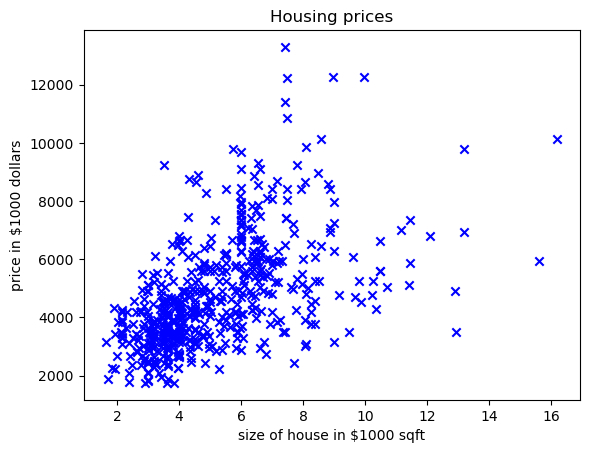

In [94]:
#how to plot data as a scatterplot with matplotlib
plt.scatter(x_train, y_train, marker = "x", c = "b")
#setting the title
plt.title("Housing prices")
plt.ylabel("price in $1000 dollars")
plt.xlabel("size of house in $1000 sqft")
plt.show()

In [95]:
def compute_model_output(x, w, b):
    '''
    Computes the prediction of a linear model
    Args:
    x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      f_wb (ndarray (m,)): model prediction
    '''
    
    m = x.shape[0]
    f_wb = np.zeros(m)
    
    for i in range (m):
        f_wb[i]= w * x[i] + b
    return f_wb

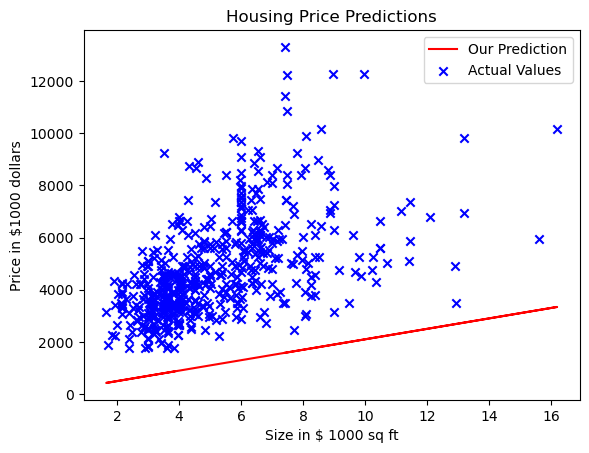

In [96]:
#Set a random weight and bias for the lineear regression and plot it just to get an idea of the data

tmp_f_wb = compute_model_output(x_train, 200, 100)

#make a plot of prediction
plt.plot(x_train, tmp_f_wb, marker = "", c = "r", label = "Our Prediction")

#scatter plot of data points 
plt.scatter(x_train, y_train, marker = "x", c = "b", label = "Actual Values")

#setting up title, subtitles

plt.title("Housing Price Predictions")
plt.ylabel("Price in $1000 dollars")
plt.xlabel("Size in $ 1000 sq ft")
plt.legend()
plt.show()


In [97]:
#The cost function

def compute_cost(x,y,w,b):
    '''
    computes cost function for linear regression
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    '''
    
    m = x.shape[0] #number of training examples 
    
    total_cost = 0
    
    for i in range(m):
        f_wb_i = w * x[i] + b               #model prediction
        total_cost += (f_wb_i - y[i])**2    #mean-squared error
        
    total_cost = total_cost*(1/(2.0*m))     #divide by 2m to get the average
    
    return total_cost

In [98]:
#gradient function, it calculates derivative of the cost

def compute_gradient(x, y, w, b):

    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    """
    A formula for the value of the gradient is found by using chain rule, we counterintuitively divided by 2
    in cost formula to account for the exponent multiplying in the gradient calculation.
    """
    
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range (m):
        f_wb_i = w * x[i] + b
        dj_dw += (f_wb_i - y[i]) * x[i]      
        dj_db += (f_wb_i - y[i])
    dj_dw *= (1.0/m)
    dj_db *= (1.0/m)
    
    return dj_dw, dj_db

In [126]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      """
    
    m = x.shape[0]
    learningCurve = np.zeros(num_iters)
    
    #iteratively optimizing w and b by nudging them in the direction of steepest descent
    for i in range (num_iters):
        #compute gradient
        dj_dw, dj_db = compute_gradient(x, y, w_in, b_in)
        
        #update w and b
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db
        learningCurve[i] = compute_cost(x, y, w_in, b_in)
        
    
    return w_in, b_in, learningCurve
        
        

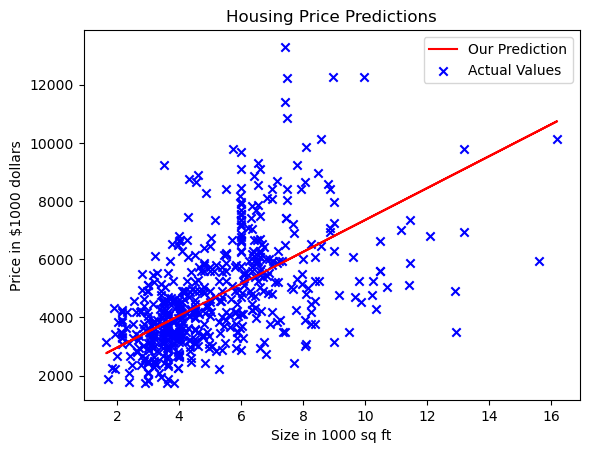

w value is:  547.9775995224528 b value is:  1868.300443465763


In [127]:
w, b, learningCurve = gradient_descent(x_train, y_train, 0, 0, 1.0e-2, 1000)

model_f_wb = compute_model_output(x_train, w, b)

#make a plot of prediction
plt.plot(x_train, model_f_wb, marker = "", c = "r", label = "Our Prediction")

#scatter plot of data points 
plt.scatter(x_train, y_train, marker = "x", c = "b", label = "Actual Values")

#setting up title, subtitles

plt.title("Housing Price Predictions")
plt.ylabel("Price in $1000 dollars")
plt.xlabel("Size in 1000 sq ft")
plt.legend()
plt.show()

print('w value is: ',w,'b value is: ', b)


(1000,)


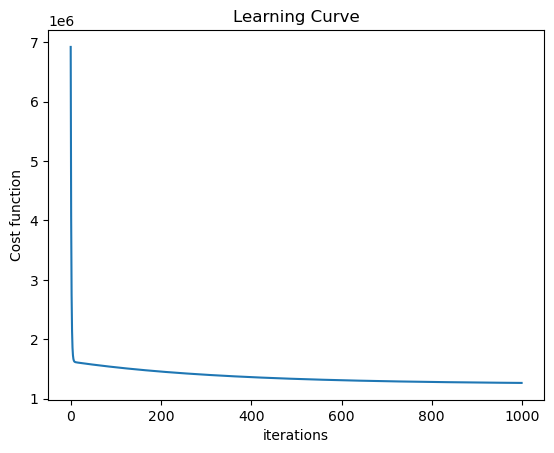

In [132]:
print(learningCurve.shape)
plt.plot(np.arange(1000), learningCurve)

plt.title("Learning Curve")
plt.ylabel("Cost function")
plt.xlabel("iterations")
plt.show()